# Preparing categorical data with scikit-learn

This recipe explains how to encode categorical data, that is, ordinal and nominal data. 

- An **ordinal feature** have ordering meaning but do not have numerical meaning (e.g., `small`, `medium`, and `large`).
- A **nominal feature** have neither ordering nor numerical meaning (e.g., `water`, `sugar`, `milk`). You can order a cup of coffee regarding to its size, that is, `small` < `medium` < `large`. Although, you cannot order things like `water` or `milk`.

It is recommended to encode categorical data (e.g., ordinal data and nominal data) before training a machine learning algorithm. Such encoding depends on the type of data and the machine learning algorithm. Below we explain how to prepare categorical data using scikit-learn.

## Interval, ordinal, and nominal data

We can distinguish the following types of data. From [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch):

**Continuous values** are strictly ordered, and a difference between various values has a strict meaning. If you are counting or measuring something with units, the valye probably is a continuous value. Example: given a package A of 2 kg and a package B of 3.5 kg, we know that package B is heavier than package A, and its difference is 1.5 kg.

**Ordinal values** have ordering meaning but do not have numerical meaning. The strict ordering of continuous values remains, but the fixed relationship between values no longer applies. Example: a cup of coffee comes in three sizes, small, medium and large. We know how to order them, that is, small < medium < large. However, we do not anything about the difference between them (how much bigger it is a large cup with respect to a small cup). We could map those three values to numbers, small=1, medium=2, and large=3. However, we cannot do math with those values (adding 1+2 does not result in a large cup). Alternatively, you could use the actual volumes of each size, say small=8, medium=12, and large=24 fluid onces. That way, you will know how much larger is a medium cup with respect to a small cup.

**~~Categorical~~ Nominal values** have neither ordering nor numerical meaning. These values are often enumerations of possibilities, assigned to arbitraty numbers. Example: water=1, coffee=2, soda=3, milk=4. Placing water first and milk last has no real logic, you simply need distinct values to differentiate them. You could assign coffee to 10 and milk to -3 with no significant change (although assigning values in the range 0..N-1 will have advantages when using one-hot encoding).

**Update** From this [post](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas), I think that categorical features are divided into ordinal and nominal. An **ordinal feature** have ordering meaning but do not have numerical meaning. A **nominal feature** have neither ordering nor numerical meaning.

From [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning):

**Numerical data**, as its name suggests, involves features that are only composed of numbers, such as integers or floating-point numbers. **Categorical data** are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set. Categorical variables are often called **nominal**. Some examples include:

- A `pet` variable with the values: `dog` and `cat`.
- A `color` variable with the names: `red`, `green`, and `blue`.
- A `place` variable with the values: `first`, `second`, and `third`.

Each value represents a different category. Some categories may have a natural relationship to each other, such as a natural ordering. The `place` variable above does have a natural ordering of values. This type of categorical variable is called an **ordinal variable** because the values can be ordered or ranked. A numerical variable can be converted to an ordinal variable by dividing the range of the numerical variable into bins and assigning values to each bin. For example, a numerical variable between 1 and 10 can be divided into an ordinal variable with 5 labels with an ordinal relationship: `1-2`, `3-4`, `5-6`, `7-8`, `9-10`. This is called **discretization**.

- **Nominal Variable**. Variable that comprises a finite set of discrete values with no rank-order relationship between values.

- **Ordinal Variable**. Variable that comprises a finite set of discrete values with a ranked ordering between values.

## Preparing categorical data

There are three main functions for preparing categorical data (i.e., ordinal data and nominal data). These functions are in the `sklearn.preprocessing` package:

- `OrdinalEncoder` for ordinal features (categories with order meaning). The resulting data is encoded with integers.
- `LabelEncoder` for nominal features (categories with no order and no numerical meaning).  The resulting data is encoded with integers.
- `OneHotEncoder` The resulting data is a binary vector.

In the following, we see how to use these encoders by using examples from the documentation. Let's begin with `LabelEncoder`. 

In [1]:
from sklearn.preprocessing import LabelEncoder

# dataset (targets only)
y = [2, 1, 2, 2, 6]

# encoder
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print(y_enc)

print("input:        {}".format(type(y_enc)))
print("output:       {}".format(type(y_enc)))
print("output dtype: {}".format(y_enc.dtype))

[1 0 1 1 2]
input:        <class 'numpy.ndarray'>
output:       <class 'numpy.ndarray'>
output dtype: int64


In [2]:
# transform and inverse transform
y = [2, 2, 1, 1, 6, 6]

y_enc = label_encoder.transform(y)
print(y_enc)

y_dec = label_encoder.inverse_transform(y_enc)
print(y_dec)

[1 1 0 0 2 2]
[2 2 1 1 6 6]


In [4]:
import pandas as pd

# dataset
data = {'y': [2, 1, 2, 2, 6]}

# convert to dataframe
y_df = pd.DataFrame(data)

# encoder
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y_df)   # this line will throw a warning
                                            # DataConversionWarning: A column-vector y was passed when a 1d array was expected.
print(y_enc)

print("input:        {}".format(type(y_enc)))
print("output:       {}".format(type(y_enc)))
print("output dtype: {}".format(y_enc.dtype))

[1 0 1 1 2]
input:        <class 'numpy.ndarray'>
output:       <class 'numpy.ndarray'>
output dtype: int64


/home/auraham/.virtualenvs/keras/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
import pandas as pd

# dataset
data = {'y': [2, 1, 2, 2, 6]}

# convert to dataframe
y_df = pd.DataFrame(data)

# encoder
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y_df.values.ravel())   # this removes the warning
                                                           # https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
print(y_enc)

print("input:        {}".format(type(y_enc)))
print("output:       {}".format(type(y_enc)))
print("output dtype: {}".format(y_enc.dtype))

[1 0 1 1 2]
input:        <class 'numpy.ndarray'>
output:       <class 'numpy.ndarray'>
output dtype: int64


The warning message is due to the shape expected by `fit_transform()` and `fit()`. According to this [anwser](https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected) in StackOverflow, we must use `y_df.values.ravel()` to flatten the values in the dataframe.

In [6]:
# Shape (5, 1)
y_df.values

array([[2],
       [1],
       [2],
       [2],
       [6]])

In [7]:
y_df.values.shape

(5, 1)

In [8]:
# Shape (5,)
y_df.values.ravel()

array([2, 1, 2, 2, 6])

In [9]:
y_df.values.ravel().shape

(5,)

**Notes about `LabelEncoder`**

- It encodes target labels with value between `0` and `n_classes-1`.
- This encoder should be used to encode target values (`y`) and not input attributes (`X`).
- The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.
- If the input is a Pandas DataFrame (`df["y"]`), the encoder will throw a warning. Use `df["y"].values.ravel()` instead.
- The target values are converted to integers (`int64`).

In [ ]:
hacer una tabla donde explique



```
encoder       input array-like  pandas df               output type
  
labelencoder    yes             no  (warning message)   numpy array (`int64`)
ordinalencoder  yes             yes                     numpy array (`float64`)

```

In [ ]:

le.classes_

le.transform([1, 1, 2, 6])

le.inverse_transform([0, 0, 1, 2])

Now, let's see how to use `OrdinalEncoder`. Taken from [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).





In [4]:
# Given a dataset with two features, we let the encoder find the 
# unique values per feature and transform the data to an ordinal encoding.
# Taken from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
from sklearn.preprocessing import OrdinalEncoder

# dataset
X = [['Male',   1], 
     ['Female', 3], 
     ['Female', 2]]

# encoder
ordinal_encoder = OrdinalEncoder()
X_enc = ordinal_encoder.fit_transform(X)
print(X_enc)

print("input:        {}".format(type(X)))
print("output:       {}".format(type(X_enc)))
print("output dtype: {}".format(X_enc.dtype))

[[1. 0.]
 [0. 2.]
 [0. 1.]]
input:        <class 'list'>
output:       <class 'numpy.ndarray'>
output dtype: float64


In [ ]:
como encode cat features y preservar orden?? por que se llama ordinalencoder si no preserva el orden?
https://stackoverflow.com/questions/28398709/preparing-ordinal-and-nominal-features-for-classification-using-onehotencoder-in



discutir esto: ordinalencoder vs labelencoder
https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder




In [18]:
print("categories: {}".format(ordinal_encoder.categories_))

categories: [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


In [2]:
# tranform and inverse transform
D = [['Female', 3], 
     ['Male',   1]]

D_enc = ordinal_encoder.transform(D)
print(D_enc)

D_dec = ordinal_encoder.inverse_transform(D_enc)
print(D_dec)

[[0. 2.]
 [1. 0.]]
[['Female' 3]
 ['Male' 1]]


`OrdinalEncoder` can also handle dataframes. Redardless of the input data type, the output of the encoder is a NumPy array.

In [3]:
import pandas as pd

# dataset
data = {'gender': ['Male', 'Female', 'Female'],
     'number': [1, 3, 2]}

# convert to dataframe
X_df = pd.DataFrame(data)

# encoder
ordinal_encoder = OrdinalEncoder()
X_df_enc = ordinal_encoder.fit_transform(X_df)
print(X_df_enc)

print("input:        {}".format(type(X_df)))
print("output:       {}".format(type(X_df_enc)))
print("output dtype: {}".format(X_df_enc.dtype))

[[1. 0.]
 [0. 2.]
 [0. 1.]]
input:        <class 'pandas.core.frame.DataFrame'>
output:       <class 'numpy.ndarray'>
output dtype: float64


In [6]:

# Esto es para demostrar que necesitamos especificar el orden

X = [
    ["first", "small"],
    ["second", "large"],
    ["third", "medium"],
    ["last", "huge"]
]

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(X)

array([[0., 3.],
       [2., 1.],
       [3., 2.],
       [1., 0.]])

In [7]:
# The ordinal variables are not sorted correctly
ordinal_encoder.categories_

[array(['first', 'last', 'second', 'third'], dtype=object),
 array(['huge', 'large', 'medium', 'small'], dtype=object)]

In [8]:
categories = [
    ["first", "second", "third", "last"],
    ["small", "medium", "large", "huge"]
]

ordinal_encoder = OrdinalEncoder(categories=categories)
ordinal_encoder.fit_transform(X)

array([[0., 0.],
       [1., 2.],
       [2., 1.],
       [3., 3.]])

In [9]:
# Now, the order is the expected
ordinal_encoder.categories_

[array(['first', 'second', 'third', 'last'], dtype=object),
 array(['small', 'medium', 'large', 'huge'], dtype=object)]

https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder



https://stackoverflow.com/questions/72170947/how-to-use-ordinalencoder-to-set-custom-order

**Notes about `OrdinalEncoder`**
- This encoder transforms categorical features as integer values. The categorical features can be either input features (`X`) or target values (`y`).
- Unlike `LabelEncoder`, which only encodes target values (`y`), `OrdinalEncoder` can encode both input features (`X`) and target values (`y`).
- The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.
- The input can be a Pandas DataFrame.
- The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.
- Although the categories are encoded as integers, the underlying data type is `float64`.

In [ ]:
Now, let's see how to use `LabelEncoder`

## Guidelines for encoding categorical data

- @todo: definir en que casos conviene usar cada encoder:

si vas a usar tree-based alg: puedes usar ordinal o labelencoder, ya que los arboles pueden manejar categorias. La decision entre ordinal o labelencoder dependera del tipo de categorial feature. ~~Si se puede ordenar, usa ordinal. Sino, usa labelencoder.~~

si vas a usar otro metodo, como neural net, usa onehotencoder, ya que estos metodos no pueden manejar categorias


## One-hot encoding

In [20]:
%matplotlib notebook
import numpy as np
import pandas as pd

# load dataset
dataset = pd.read_csv("datasets/housing.csv")
dataset.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY

There are 10 columns. Note that `"ocean_proximity"` contains five categories:
    
- `<1H OCEAN`
- `INLAND`
- `NEAR OCEAN`
- `NEAR BAY`
- `ISLAND`

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In order to get a better intuition about the number of examples per category, let's make a few plots:

<IPython.core.display.Javascript object>


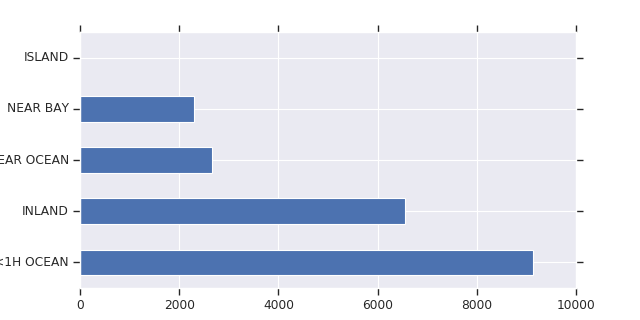

In [33]:
dataset["ocean_proximity"].value_counts().plot(kind="barh", figsize=(8,4));

<IPython.core.display.Javascript object>


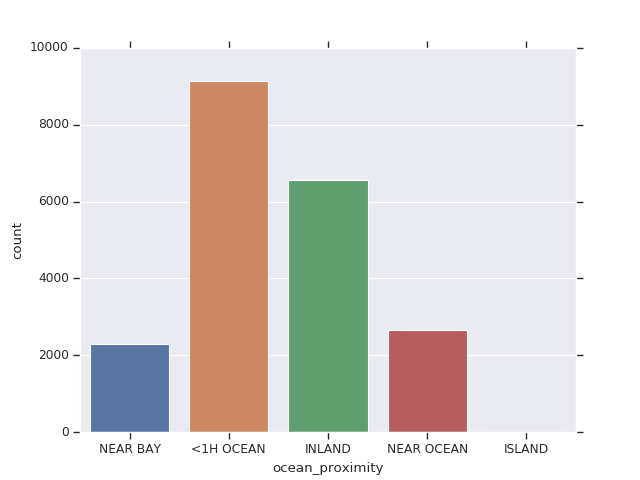

In [34]:
%matplotlib notebook
import seaborn as sns
sns.set()

sns.countplot(dataset["ocean_proximity"]);

In [36]:
housing_cat = dataset[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
housing_cat["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Listing 3.7 Example of one-hot encoding
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)
print(values.dtype)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)  # nominal feature (have no order nor numerical meaning)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)  # remember to use sparse=False
integer_encoded = integer_encoded.reshape((len(integer_encoded), 1))
one_hot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(one_hot_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
<U4
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## References

- [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch)
- [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning)